In [19]:
from Utils import supplier_config as sc
import requests
import json
import pandas as pd

GET /v1/electricity-meter-points/{mpan}/meters/{serial_number}/consumption/    
GET /v1/gas-meter-points/{mprn}/meters/{serial_number}/consumption/  

In [2]:
s = requests.Session()

In [71]:
elec_r = s.get(sc.API_ROOT + f'/v1/electricity-meter-points/{sc.electric_MPAN}/meters/{sc.electric_serial_number}/consumption/?page_size=25000',
    auth=(sc.API_KEY,'')
 )
elec_r.raise_for_status()

In [90]:
elec_j = json.loads(elec_r.content)
print(elec_j['results'][0])
elec_df = (pd.DataFrame(elec_j['results']))


{'consumption': 0.344, 'interval_start': '2023-03-11T23:30:00Z', 'interval_end': '2023-03-12T00:00:00Z'}


In [91]:
elec_df['interval_start'] = pd.to_datetime(elec_df['interval_start'], utc=True)
elec_df['interval_end'] = pd.to_datetime(elec_df['interval_end'], utc=True)
elec_df.index = elec_df['interval_start']
elec_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16561 entries, 2023-03-11 23:30:00+00:00 to 2022-02-25 00:00:00+00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   consumption     16561 non-null  float64            
 1   interval_start  16561 non-null  datetime64[ns, UTC]
 2   interval_end    16561 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 517.5 KB


In [92]:
elec_df['weekday'] = elec_df['interval_start'].dt.dayofweek

<Axes: xlabel='weekday'>

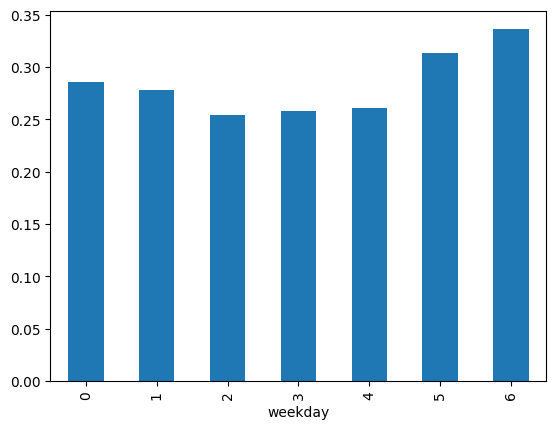

In [93]:
elec_weekday_df = elec_df.groupby('weekday')['consumption'].mean()
elec_weekday_df.plot.bar()

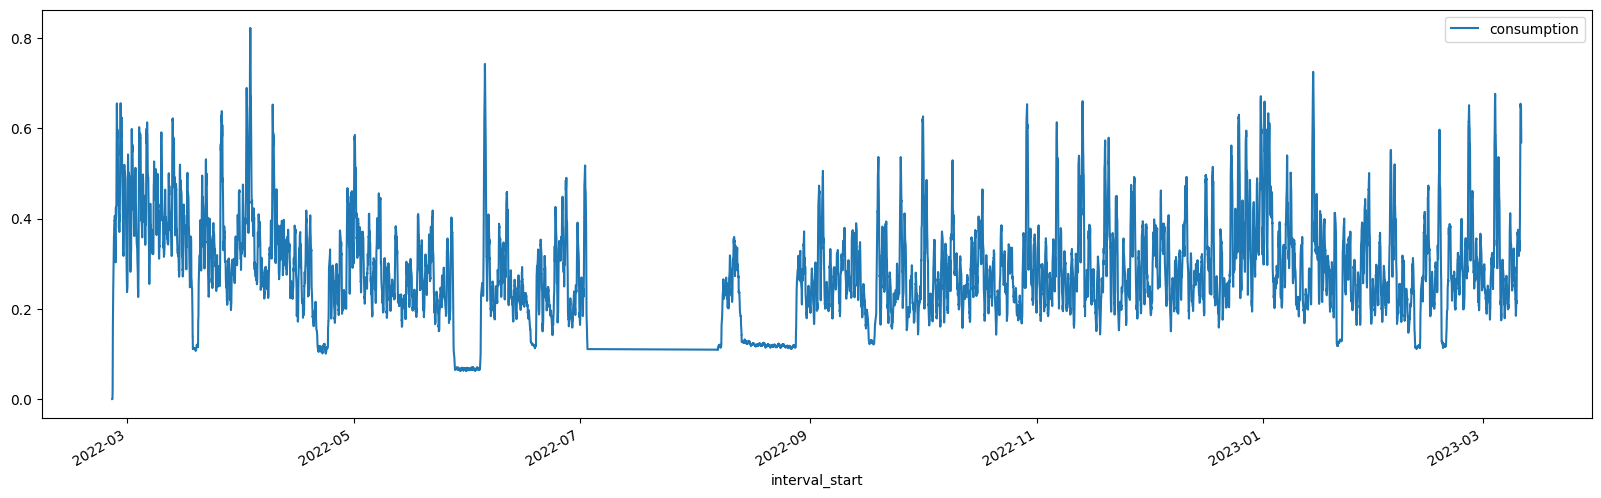

In [82]:

elec_df = elec_df.drop('interval_start', axis=1)
elec_df = elec_df.drop('interval_end', axis=1)
_ = elec_df.rolling(window=4*7).mean().plot(figsize=(20,6))

In [64]:
gas_r = s.get(sc.API_ROOT + f'/v1/gas-meter-points/{sc.gas_MPRN}/meters/{sc.gas_serial_number}/consumption/?page_size=25000',
    auth=(sc.API_KEY,'')
 )
gas_r.raise_for_status()

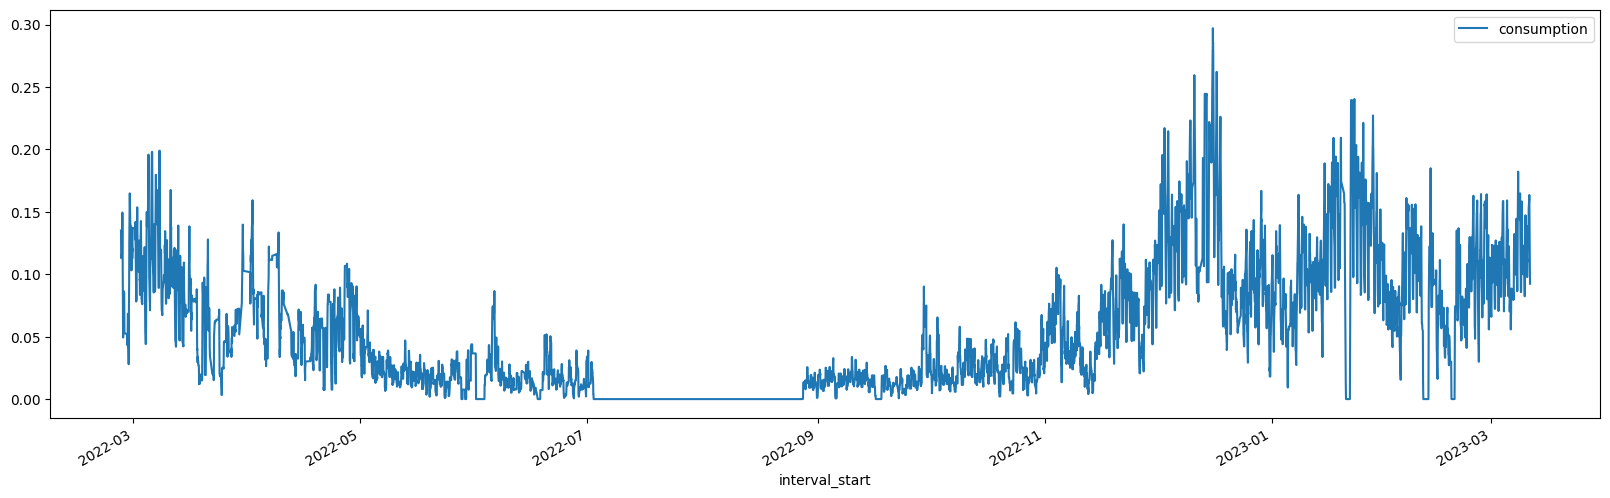

In [65]:
gas_j = json.loads(gas_r.content)
gas_df = (
    pd.DataFrame(gas_j['results']))
gas_df.interval_start = pd.to_datetime(gas_df.interval_start)
gas_df = gas_df.set_index('interval_start')

gas_df = gas_df.drop('interval_end', axis=1)
_ = gas_df.rolling(window=4*7).mean().plot(figsize=(20,6))

In [66]:
import matplotlib.pyplot as plt

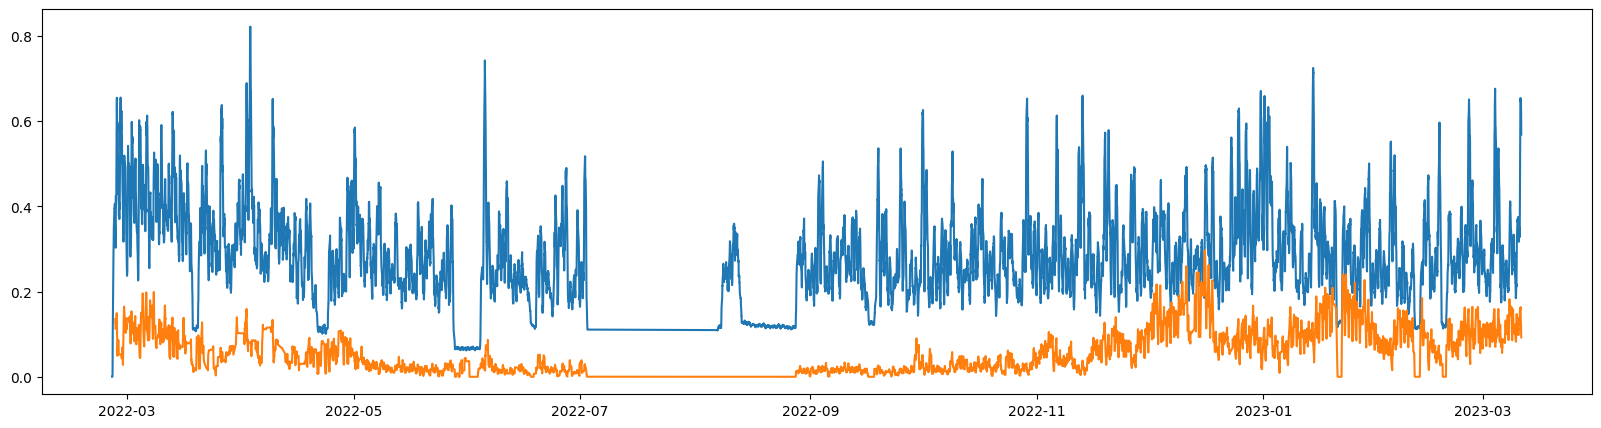

In [67]:
plt.figure(figsize=(20,5))
plt.plot(elec_df.rolling(window=4*7).mean()) # .plot(figsize=(20,6))
_ = plt.plot(gas_df.rolling(window=4*7).mean()) # .plot(figsize=(20,6))

In [68]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16561 entries, 2023-03-11 23:30:00+00:00 to 2022-02-25 00:00:00+00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  16561 non-null  float64
dtypes: float64(1)
memory usage: 258.8+ KB


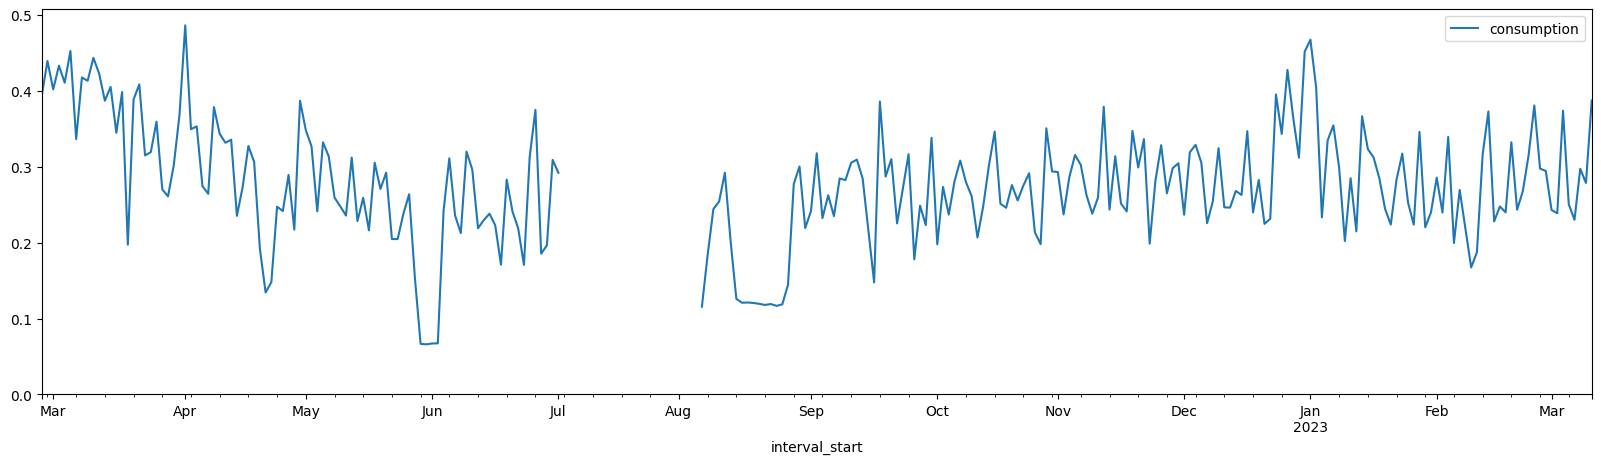

In [88]:
_ = elec_df.resample('B').mean().plot(figsize=(20,5), ylim=(0,None))